In [1]:
%load_ext autoreload

%autoreload 2


# Code to Record minimum TE achievable
This code calls trapezoidal and gropt waveforms to identify and record minimum TE achievable and the difference between the two. These are then saved out to make resultant figures

In [3]:
import numpy as np
import sys
sys.path.append('/Users/ariel/Documents/GitHub/pypulseq')
import pypulseq as pp

sys.path.append("utils/")
from trap_waveforms import *

sys.path.append("utils/gropt/python")
import gropt
from helper_utils import *

from matplotlib import pyplot as plt
import numpy as np
from numpy import arctan2, sqrt
import numexpr as ne

import pandas as pd

In [8]:
bval = [250, 500, 750, 1000, 2000, 5000, 10000]
T_readout = [5, 10, 20, 30, 40, 50]
tol = 0.01

gropt_track = np.zeros((len(bval),len(T_readout)))
trap_track = np.zeros((len(bval),len(T_readout)))

for bb in range(len(bval)):
    for tt in range(len(T_readout)):

        input_params ={'mode': 'diff_bval', 
            'T_90': 3, 
            'T_180': 5, 
            'gmax': 45, 
            'smax': 200, 
            'dt': 8e-05, 
            'T_readout': T_readout[tt],
            'b': bval[bb], 
            'MMT': 2, 
            'pns_thresh': 0.8}

        pns = 2
        iter = 0

        G_gropt, TE =  get_min_TE(input_params,verbose = True, bval =input_params['b'])
        gropt_b = get_bval(G_gropt, input_params)
        print('GrOpt b-val ={:.2f}'.format(gropt_b))

        gropt_track[bb,tt] = TE
        np.savetxt('results_gropt_mmt2_45.csv', gropt_track, delimiter=',',  comments='', fmt='%.6f')


        input_params['b'] = gropt_b

        while np.max(pns) > input_params['pns_thresh']:
            g,t,TE,b,zeta,flat, = asymm(input_params, tol)
            #plt.plot(g)
            #plt.ylim([-.200,.200])
            pns = np.abs(get_stim(g[np.newaxis,:], input_params['dt']))

            input_params['smax']-=5
            
            if len(g) == 1:
                input_params['gmax']-=5
                input_params['smax']=200
                pns = 2

        print('TRAP b-val ={:.2f}, TRAP TE = {:.2f}'.format(b,TE))
        trap_track[bb,tt] = TE
        np.savetxt('results_trap_mmt0_40.csv', trap_track, delimiter=',',  comments='',fmt='%.6f')


Testing TE = 111.500 67.250 45.125 56.188 61.719 64.484 65.867 66.559 66.904 66.731 66.818 66.861 66.883 66.872 Final TE = 66.883 ms
GrOpt b-val =251.34
	Not within tolerance but bval exceeded: bval = 260.86,flat = 0.01,te=71.66
246.29204928833067
	Not within tolerance but bval exceeded: bval = 260.93,flat = 0.01,te=71.64
246.36110226697926
	Not within tolerance but bval exceeded: bval = 263.25,flat = 0.01,te=71.62
248.58945330815223
	Not within tolerance but bval exceeded: bval = 263.25,flat = 0.01,te=71.59
248.58945330815223
	Not within tolerance but bval exceeded: bval = 263.31,flat = 0.01,te=71.57
248.64365179506572
	Not within tolerance but bval exceeded: bval = 259.95,flat = 0.01,te=71.54
245.4109136561916
	Not within tolerance but bval exceeded: bval = 256.64,flat = 0.01,te=71.51
242.22477978447608
	Not within tolerance but bval exceeded: bval = 256.71,flat = 0.01,te=71.48
242.29352355222275
	Not within tolerance but bval exceeded: bval = 258.97,flat = 0.01,te=71.44
244.46977049

UnboundLocalError: cannot access local variable 'T_out' where it is not associated with a value

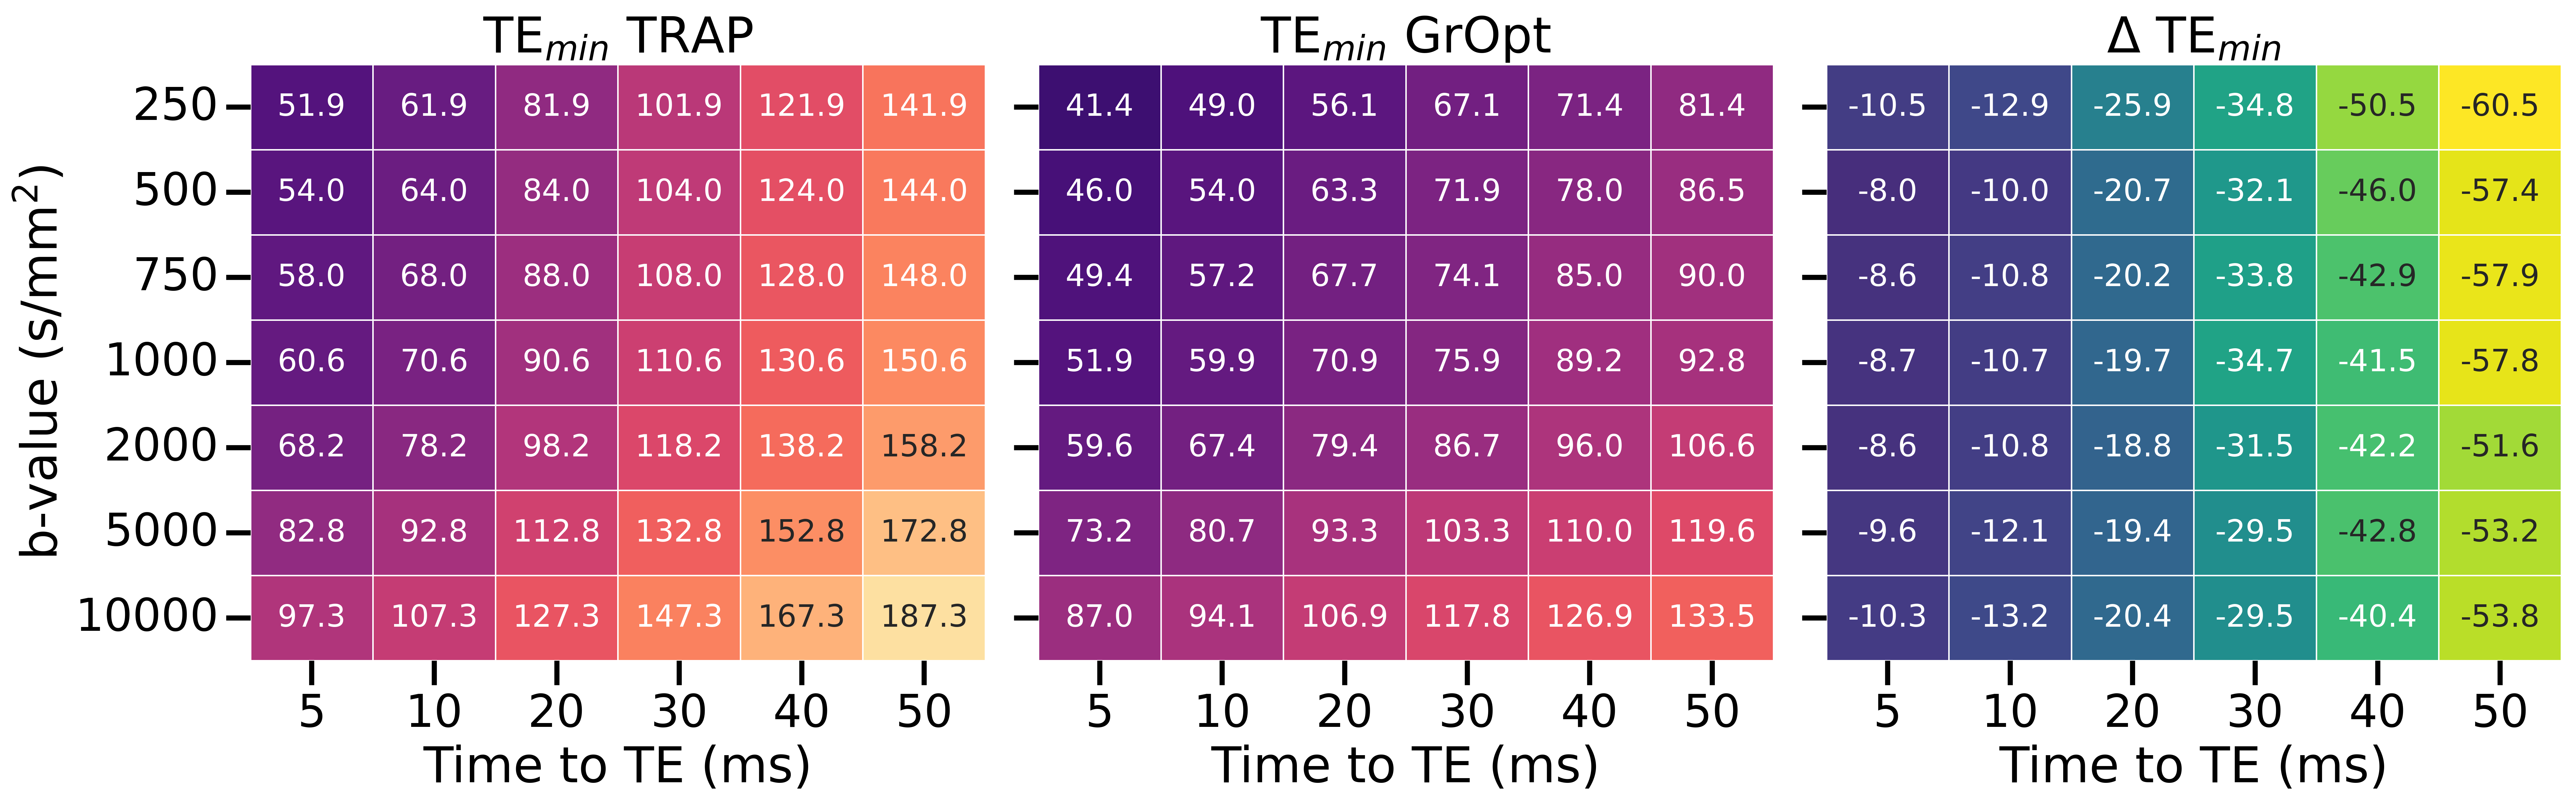

In [8]:
bval = [250, 500, 750, 1000, 2000, 5000, 10000]
T_readout = [5, 10, 20, 30, 40, 50]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")  # or "notebook", "paper", "poster" for 
rc={"font.size": 18, 
    "axes.titlesize": 20, 
    "axes.labelsize": 25, 
    "xtick.labelsize": 23, 
    "ytick.labelsize": 23}

# Read in the CSV files

df1 = pd.read_csv('results_gropt_mmt2.csv',header=  None)

df0 = pd.read_csv('results_trap_mmt2.csv',header=  None)

# Set the style to darkgrid

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6),sharex = True, sharey=True,dpi = 500)  # 1 row, 3 columns

# Plot df1
sns.heatmap(df0, cmap='magma', cbar = False,annot=True, fmt=".1f", linewidths=.5, ax=axes[0], vmin = 0, vmax = 200,xticklabels=T_readout, yticklabels=bval,annot_kws={"fontsize":15})
axes[0].set_title('TE$_{min}$ TRAP')
axes[0].set_xlabel('Time to TE (ms)')
axes[0].set_ylabel('b-value (s/mm$^2$)')

# Plot df0
sns.heatmap(df1, cmap='magma',cbar = False, annot=True, fmt=".1f", linewidths=.5, ax=axes[1], vmin = 0, vmax = 200, xticklabels=T_readout, yticklabels=bval,annot_kws={"fontsize":15})
axes[1].set_title('TE$_{min}$ GrOpt')
axes[1].set_xlabel('Time to TE (ms)')


# Plot df1 - df0
sns.heatmap(df1 - df0, cmap='viridis_r', cbar = False, annot=True, fmt=".1f", linewidths=.5, ax=axes[2], vmin=-60, vmax=0, xticklabels=T_readout, yticklabels=bval,annot_kws={"fontsize":15})
axes[2].set_title('$\Delta$ TE$_{min}$')
axes[2].set_xlabel('Time to TE (ms)')


plt.tight_layout()

fig.savefig('test_m2.svg',transparent=True)
plt.show()

<Axes: >

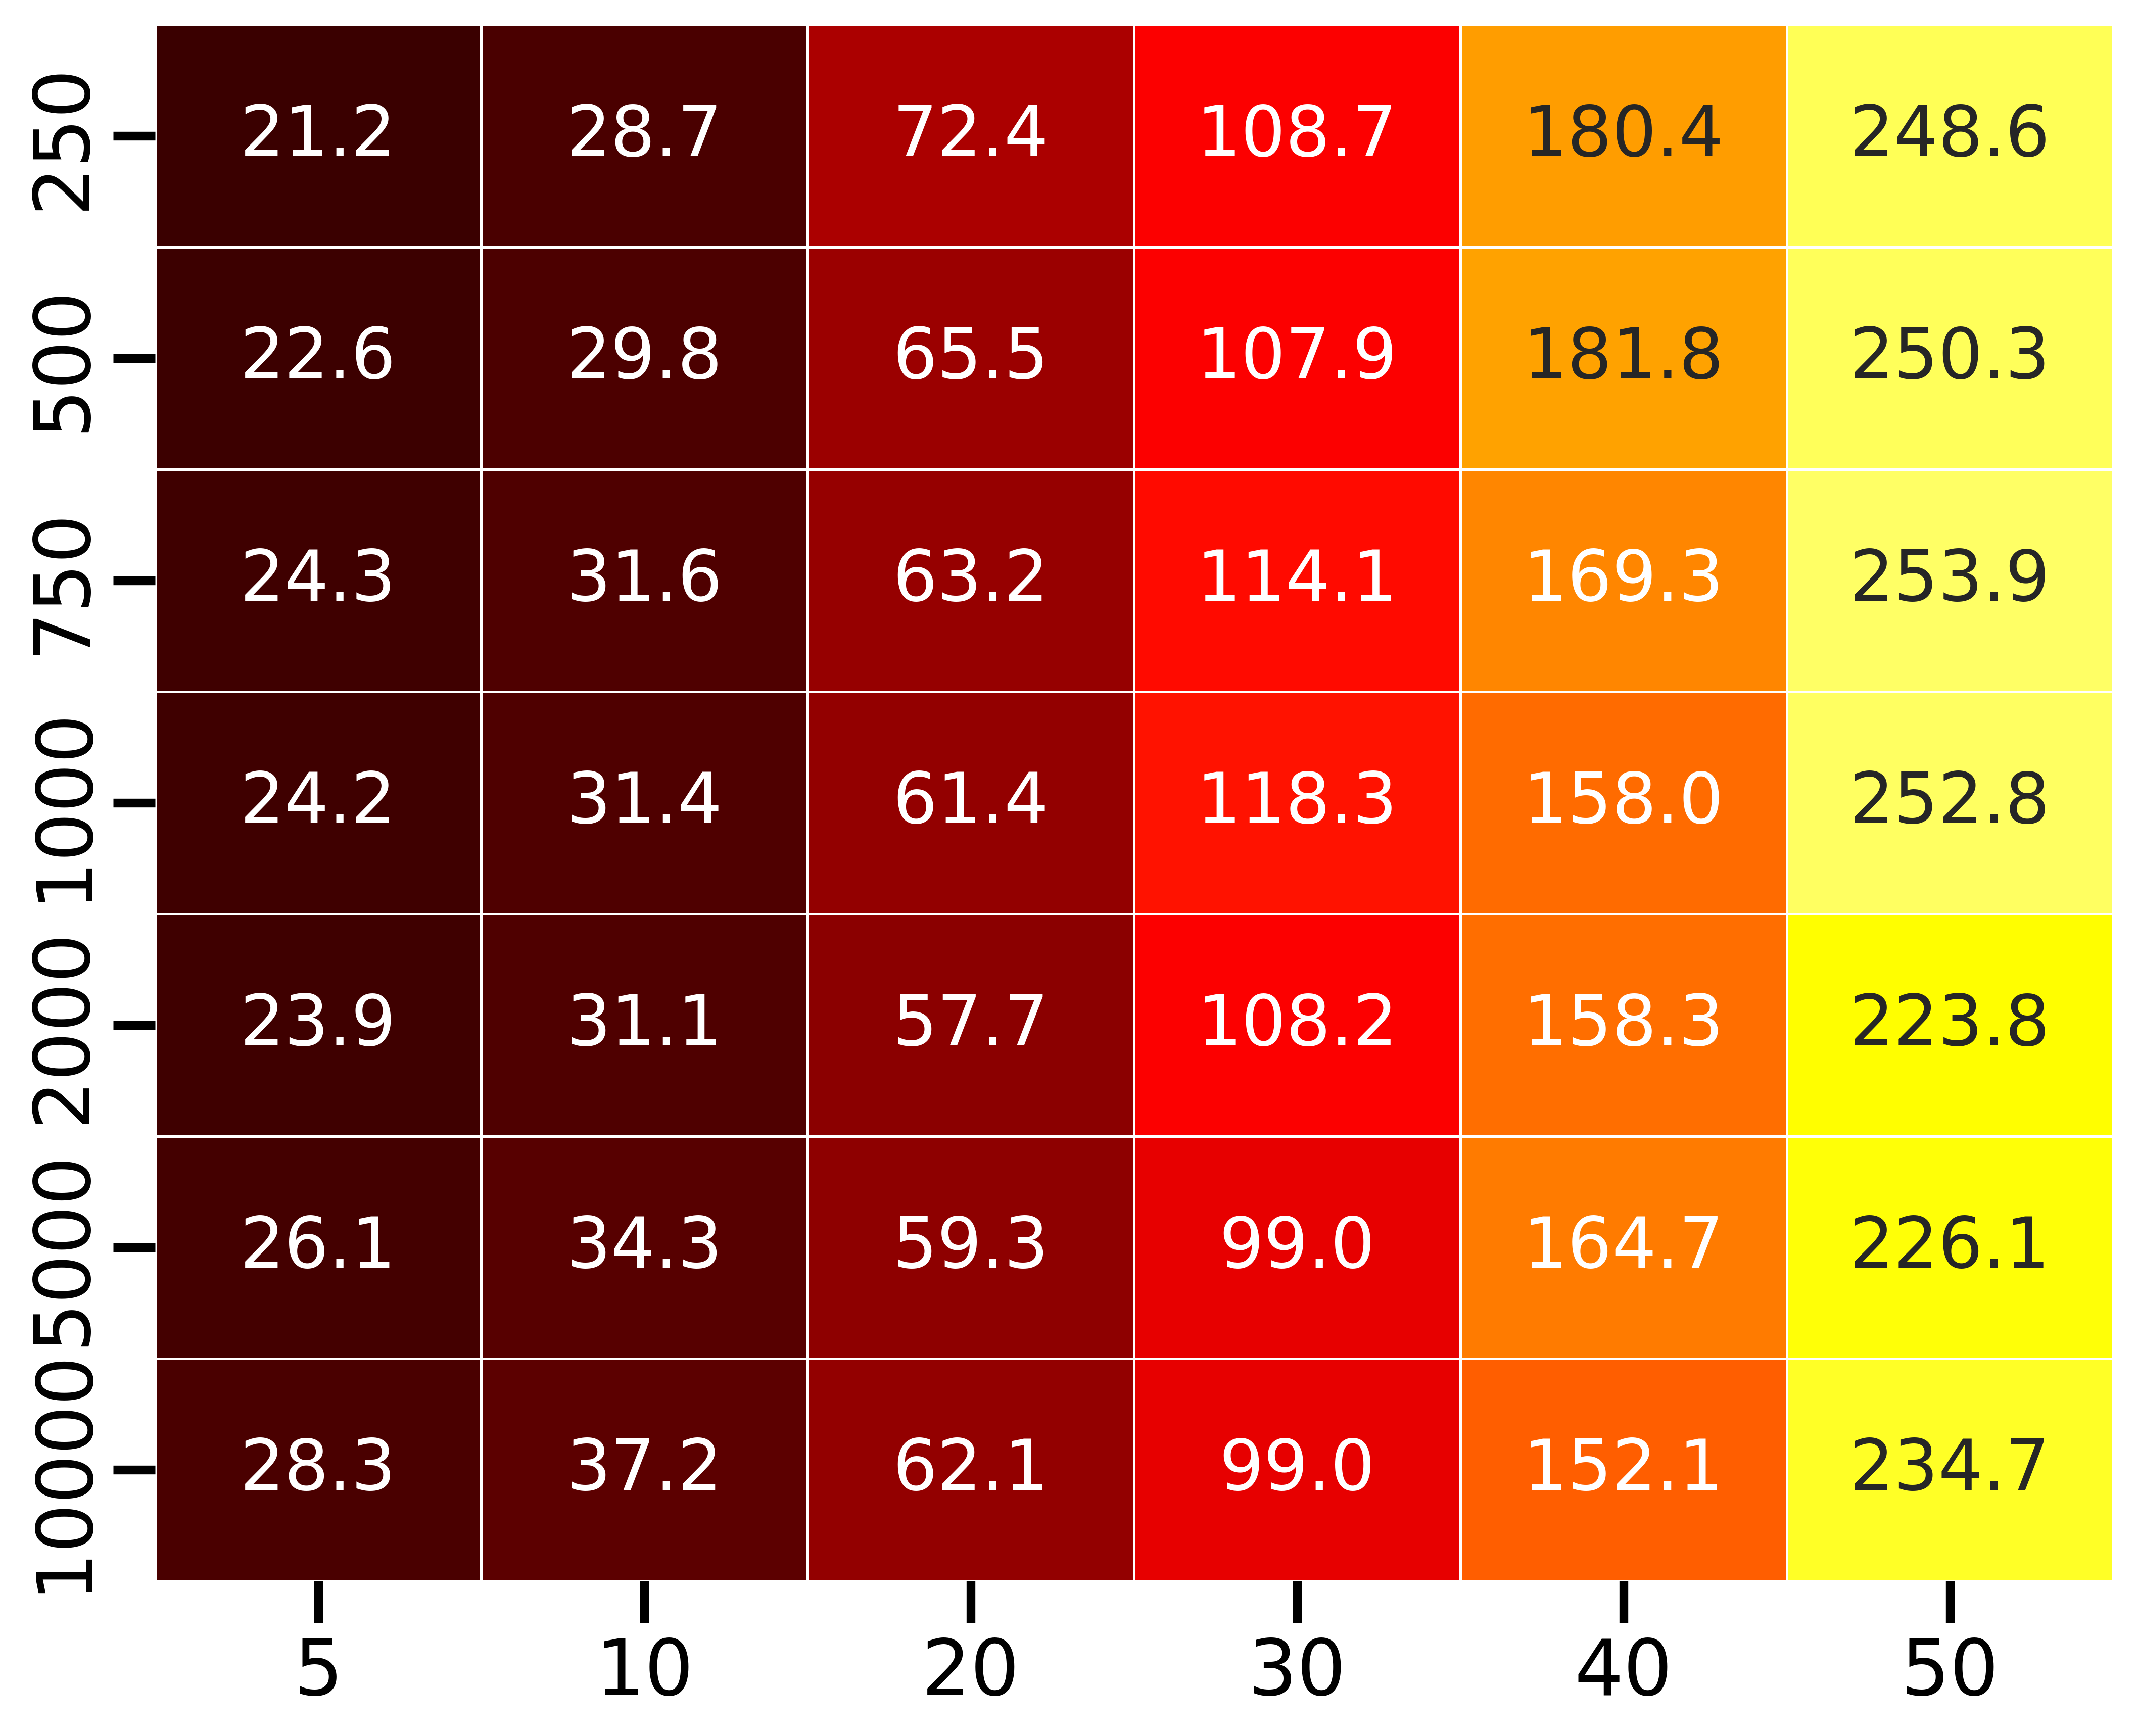

In [35]:

fig, axes = plt.subplots(1, 1, figsize=(10, 8),sharex = True, sharey=True,dpi = 500)  # 1 row, 3 columns
gm = 46



bval = [250, 500, 750, 1000, 2000, 5000, 10000]
T_readout = [5, 10, 20, 30, 40, 50]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")  # or "notebook", "paper", "poster" for 
rc={"font.size": 18, 
    "axes.titlesize": 20, 
    "axes.labelsize": 25, 
    "xtick.labelsize": 23, 
    "ytick.labelsize": 23}

# Read in the CSV files

df1 = pd.read_csv('results_gropt_mmt2.csv',header=  None)

df0 = pd.read_csv('results_trap_mmt2.csv',header=  None)

# Set the style to darkgrid

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6),sharex = True, sharey=True,dpi = 500)  # 1 row, 3 columns

# Plot dff
for gm in []:
    difference = (np.exp(-df1/gm) -  np.exp(-df0/gm))/ np.exp(-df0/gm) * 100
    sns.heatmap(difference, cmap='hot', cbar = False,annot=True, fmt=".1f", linewidths=.5, ax=axes[0], vmin = 0, vmax = 300,xticklabels=T_readout, yticklabels=bval,annot_kws={"fontsize":15})
    axes[0].set_title('TE$_{min}$ TRAP')
    axes[0].set_xlabel('Time to TE (ms)')
    axes[0].set_ylabel('b-value (s/mm$^2$)')



